In [28]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

In [29]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [30]:
exp_tag = 'f25k_d1_rt20p_paired'
#exp_tag = 'f25k_d2_rt20p_paired'

In [31]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks_{exp_tag}.pickle')

In [32]:
usdm_dtd = dnw.prune_tracks(usdm_dtd)

In [33]:
spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks_{exp_tag}.pickle')

In [34]:
spi30d_dtd = dnw.prune_tracks(spi30d_dtd)

In [35]:
spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks_{exp_tag}.pickle')

In [36]:
spi180d_dtd = dnw.prune_tracks(spi180d_dtd)

In [37]:
def remove_singulars(dtd):
    lengths = [len(track) for track in dtd['t']]
    filter = np.array(lengths) > 1

    filtered_dtd = dict()
    for key in dtd.keys():
        filtered_dtd[key] = [dtd[key][i] for i in np.where(filter)[0]]

    return filtered_dtd

In [38]:
np.where([len(track)  for track in usdm_dtd['t']] == 1)

/tmp/ipykernel_2495399/1538783741.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where([len(track)  for track in usdm_dtd['t']] == 1)


(array([], dtype=int64),)

In [39]:
np.where([len(track)  for track in spi180d_dtd['t']] == 1)

/tmp/ipykernel_2495399/3642154375.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where([len(track)  for track in spi180d_dtd['t']] == 1)


(array([], dtype=int64),)

In [40]:
np.where([len(track)  for track in spi30d_dtd['t']] == 1)

/tmp/ipykernel_2495399/4228051934.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where([len(track)  for track in spi30d_dtd['t']] == 1)


(array([], dtype=int64),)

In [41]:
usdm_dtd = remove_singulars(usdm_dtd)
spi30d_dtd = remove_singulars(spi30d_dtd)
spi180d_dtd = remove_singulars(spi180d_dtd)

In [42]:
np.where([len(track)  for track in spi30d_dtd['t']] == 1)

/tmp/ipykernel_2495399/4228051934.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where([len(track)  for track in spi30d_dtd['t']] == 1)


(array([], dtype=int64),)

In [12]:
usdm_summ, usdm_summ_grp = dnw.compute_track_summary_characterization(usdm_dtd, 7)

In [13]:
spi30d_summ, spi30d_summ_grp = dnw.compute_track_summary_characterization(spi30d_dtd, 7)

In [14]:
spi180d_summ, spi180d_summ_grp = dnw.compute_track_summary_characterization(spi180d_dtd, 7)

In [15]:
usdm_summ_grp['lifetime'].agg(['mean', 'median', 'max', 'min', 'std', 'count']).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",21.0,21.0,28.0,14.0,6.0,4
"(30, 60]",47.0,42.0,56.0,42.0,8.0,3
"(60, 90]",65.0,63.0,70.0,63.0,4.0,3
"(90, 180]",120.0,119.0,161.0,98.0,19.0,8
"(180, 365]",252.0,252.0,273.0,231.0,30.0,2
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",3860.0,3860.0,4032.0,3689.0,243.0,2


In [16]:
spi30d_summ_grp['lifetime'].agg(['mean', 'median', 'max', 'min', 'std', 'count']).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",16.0,14.0,28.0,7.0,6.0,151
"(30, 60]",44.0,42.0,56.0,35.0,7.0,28
"(60, 90]",72.0,70.0,84.0,63.0,6.0,17
"(90, 180]",110.0,105.0,161.0,91.0,25.0,7
"(180, 365]",252.0,252.0,252.0,252.0,NaN,1
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [17]:
spi180d_summ_grp['lifetime'].agg(['mean', 'median', 'max', 'min', 'std', 'count']).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",15.0,14.0,28.0,7.0,7.0,56
"(30, 60]",44.0,42.0,56.0,35.0,7.0,15
"(60, 90]",75.0,80.0,84.0,63.0,10.0,8
"(90, 180]",129.0,119.0,168.0,91.0,32.0,17
"(180, 365]",271.0,245.0,357.0,210.0,77.0,3
"(365, 730]",410.0,392.0,483.0,371.0,42.0,6
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [18]:
(usdm_summ_grp['distance'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",41.0,29.0,106.0,0.0,51.0,0.0
"(30, 60]",55.0,24.0,130.0,10.0,66.0,0.0
"(60, 90]",96.0,23.0,262.0,4.0,143.0,0.0
"(90, 180]",544.0,561.0,1209.0,51.0,393.0,0.0
"(180, 365]",737.0,737.0,1427.0,48.0,975.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",14686.0,14686.0,17777.0,11595.0,4371.0,0.0


In [19]:
(spi30d_summ_grp['distance'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",459.0,301.0,2729.0,23.0,454.0,0.0
"(30, 60]",1433.0,1250.0,2692.0,306.0,675.0,0.0
"(60, 90]",2552.0,2286.0,4716.0,1193.0,1035.0,0.0
"(90, 180]",4498.0,4706.0,7204.0,1865.0,2048.0,0.0
"(180, 365]",13302.0,13302.0,13302.0,13302.0,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [20]:
(spi180d_summ_grp['distance'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",131.0,76.0,781.0,9.0,147.0,0.0
"(30, 60]",266.0,222.0,848.0,63.0,213.0,0.0
"(60, 90]",946.0,555.0,2840.0,134.0,941.0,0.0
"(90, 180]",1205.0,897.0,5533.0,311.0,1282.0,0.0
"(180, 365]",2441.0,2218.0,4042.0,1064.0,1502.0,0.0
"(365, 730]",5421.0,5177.0,8292.0,3234.0,1642.0,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
(usdm_summ_grp['displacement'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",41.0,29.0,106.0,0.0,51.0,0.0
"(30, 60]",13.0,8.0,24.0,5.0,10.0,0.0
"(60, 90]",57.0,23.0,144.0,4.0,76.0,0.0
"(90, 180]",194.0,154.0,421.0,49.0,134.0,0.0
"(180, 365]",41.0,41.0,49.0,34.0,11.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",924.0,924.0,974.0,873.0,71.0,0.0


In [22]:
(spi30d_summ_grp['displacement'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",266.0,166.0,1237.0,7.0,280.0,0.0
"(30, 60]",592.0,558.0,1271.0,122.0,318.0,0.0
"(60, 90]",704.0,759.0,1615.0,40.0,420.0,0.0
"(90, 180]",696.0,642.0,1272.0,128.0,442.0,0.0
"(180, 365]",1119.0,1119.0,1119.0,1119.0,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [23]:
(spi180d_summ_grp['displacement'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",65.0,32.0,537.0,7.0,92.0,0.0
"(30, 60]",116.0,86.0,365.0,16.0,103.0,0.0
"(60, 90]",154.0,88.0,538.0,9.0,175.0,0.0
"(90, 180]",192.0,91.0,806.0,13.0,232.0,0.0
"(180, 365]",482.0,485.0,725.0,235.0,245.0,0.0
"(365, 730]",823.0,847.0,1289.0,352.0,320.0,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [24]:
(usdm_summ_grp['average velocity'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",3.0,1.0,8.0,0.0,4.0,0.0
"(30, 60]",1.0,1.0,3.0,0.0,2.0,0.0
"(60, 90]",2.0,0.0,4.0,0.0,2.0,0.0
"(90, 180]",4.0,5.0,10.0,0.0,3.0,0.0
"(180, 365]",3.0,3.0,5.0,0.0,4.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",4.0,4.0,5.0,3.0,1.0,0.0


In [25]:
(spi30d_summ_grp['average velocity'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",29.0,20.0,110.0,2.0,25.0,0.0
"(30, 60]",33.0,30.0,64.0,7.0,16.0,0.0
"(60, 90]",36.0,30.0,68.0,17.0,15.0,0.0
"(90, 180]",40.0,45.0,53.0,20.0,14.0,0.0
"(180, 365]",53.0,53.0,53.0,53.0,NaN,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [26]:
(spi180d_summ_grp['average velocity'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",8.0,5.0,37.0,1.0,8.0,0.0
"(30, 60]",6.0,5.0,17.0,2.0,4.0,0.0
"(60, 90]",12.0,7.0,34.0,2.0,12.0,0.0
"(90, 180]",9.0,7.0,33.0,2.0,9.0,0.0
"(180, 365]",8.0,9.0,11.0,5.0,3.0,0.0
"(365, 730]",13.0,12.0,22.0,8.0,5.0,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [27]:
usdm_summ_grp['similarity'].agg(['mean', 'median', 'max', 'min', 'std', 'count']).round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.940,0.941,1.000,0.878,0.069,4
"(30, 60]",0.953,0.986,0.989,0.885,0.059,3
"(60, 90]",0.930,0.955,0.994,0.840,0.080,3
"(90, 180]",0.885,0.890,0.966,0.779,0.057,8
"(180, 365]",0.931,0.931,0.983,0.879,0.073,2
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",0.953,0.953,0.959,0.947,0.009,2


In [28]:
spi30d_summ_grp['similarity'].agg(['mean', 'median', 'max', 'min', 'std', 'count']).round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.644,0.643,0.963,0.246,0.157,151
"(30, 60]",0.609,0.631,0.804,0.425,0.094,28
"(60, 90]",0.603,0.607,0.722,0.450,0.067,17
"(90, 180]",0.597,0.589,0.696,0.510,0.069,7
"(180, 365]",0.561,0.561,0.561,0.561,NaN,1
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [29]:
spi180d_summ_grp['similarity'].agg(['mean', 'median', 'max', 'min', 'std', 'count']).round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.766,0.784,0.936,0.475,0.113,56
"(30, 60]",0.772,0.805,0.896,0.513,0.102,15
"(60, 90]",0.743,0.772,0.877,0.531,0.108,8
"(90, 180]",0.789,0.817,0.881,0.585,0.085,17
"(180, 365]",0.816,0.814,0.834,0.802,0.016,3
"(365, 730]",0.799,0.799,0.839,0.766,0.025,6
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


## Boxplots

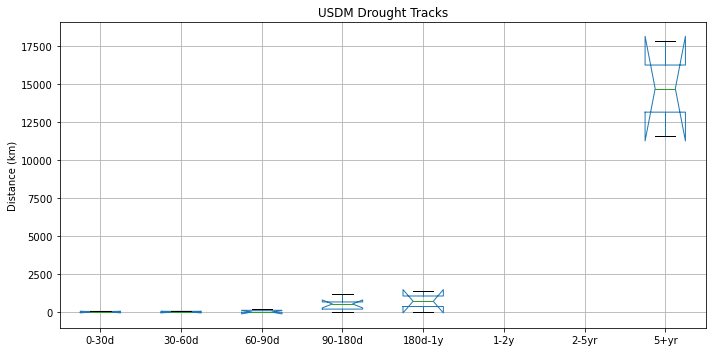

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['distance']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("USDM Drought Tracks")

plt.tight_layout()

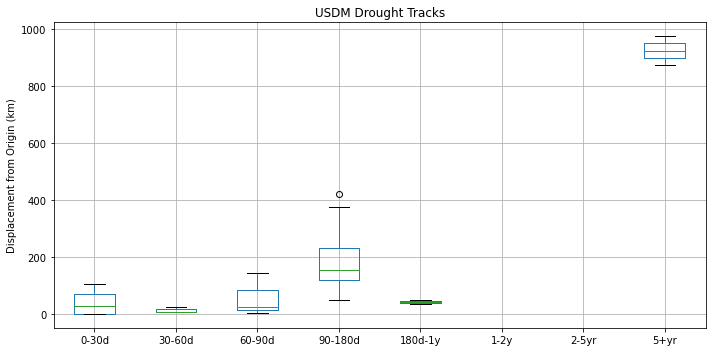

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['displacement']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

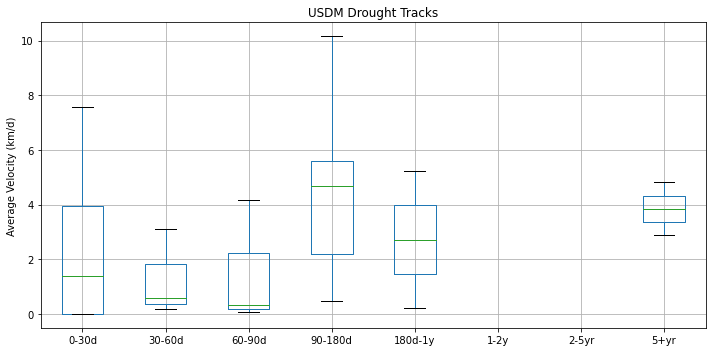

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['average velocity']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

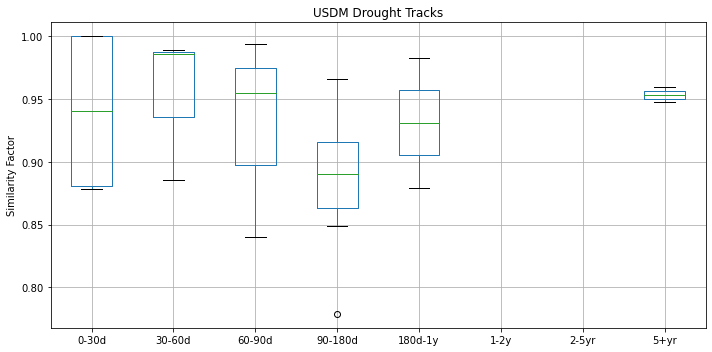

In [31]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['similarity']).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

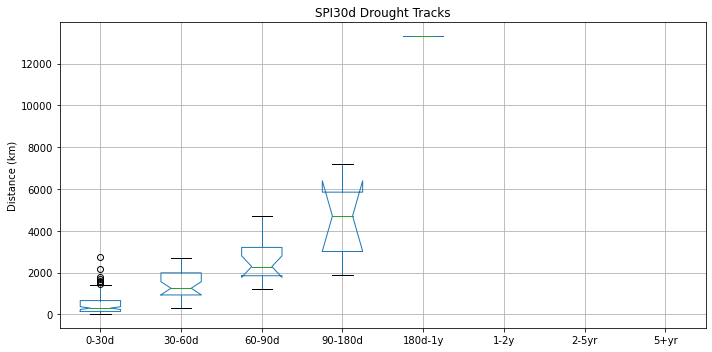

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['distance']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI30d Drought Tracks")

plt.tight_layout()

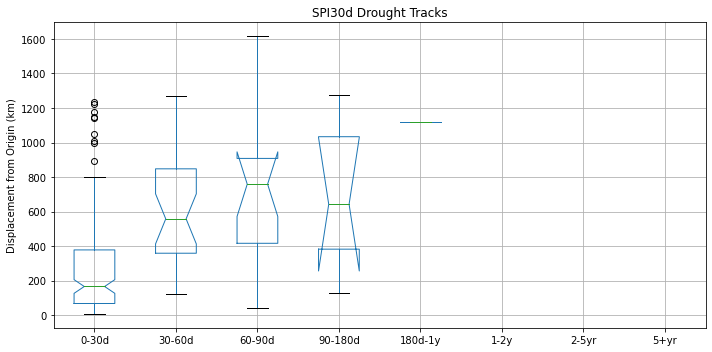

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['displacement']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

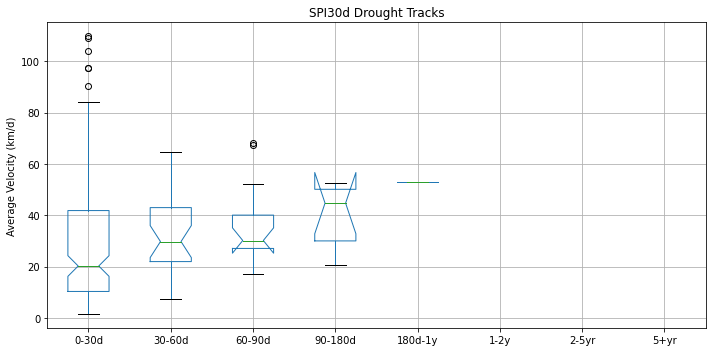

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['average velocity']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

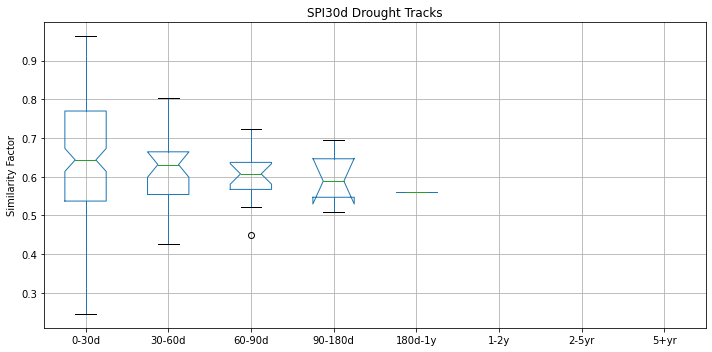

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['similarity']).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

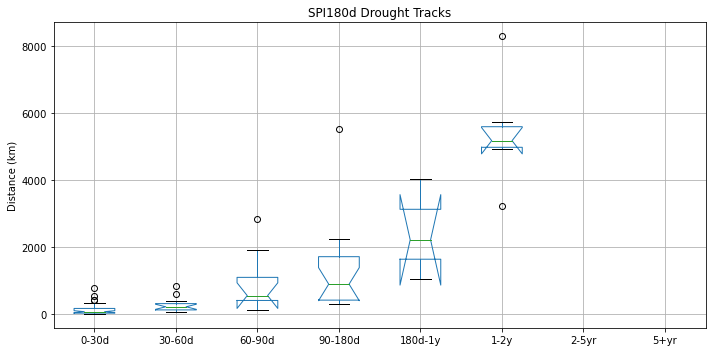

In [36]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['distance']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI180d Drought Tracks")

plt.tight_layout()

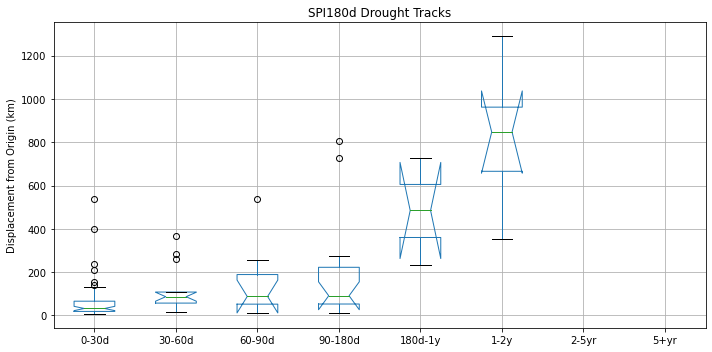

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['displacement']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

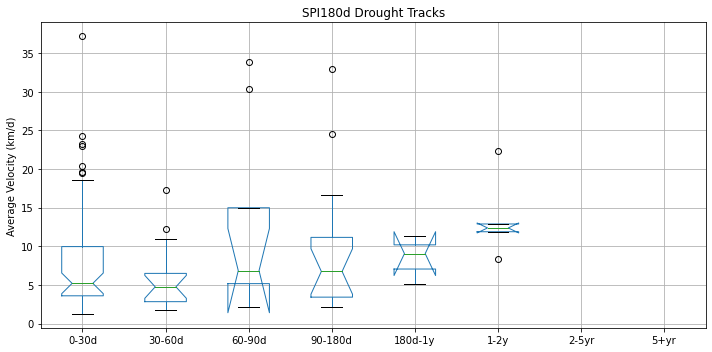

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['average velocity']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

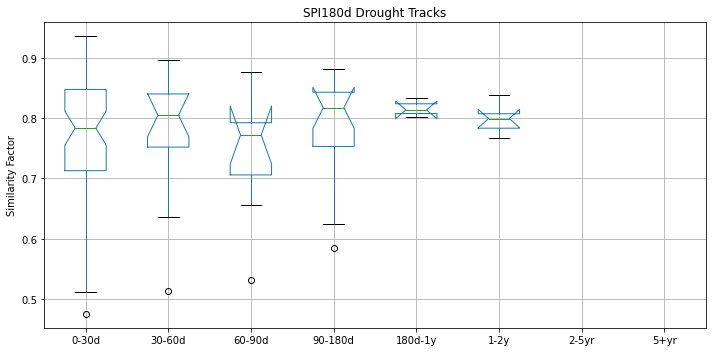

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['similarity']).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

In [40]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(0.0, 30.0, closed='right'),
 Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(90.0, 180.0, closed='right'),
 Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right')]

In [41]:
pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])

,lifetime,distance,displacement,average velocity,similarity,xy_size,uv_size
0,7,44125.010447,43779.770087,6303.572921,0.783179,"[3737, 5698]","[5698, 6258]"
2,7,64782.532234,49622.824640,9254.647462,0.667645,"[5292, 3710]","[3710, 2353]"
7,14,259806.579024,41495.019952,18557.612787,0.526796,"[2630, 1525, 3694]","[1525, 3694, 2171]"
8,21,135395.486290,97914.577025,6447.404109,0.604628,"[2081, 1861, 3615, 1877]","[1861, 3615, 1877, 3829]"
10,21,30951.291762,22211.742860,1473.871036,0.922290,"[2201, 2139, 1998, 1903]","[2139, 1998, 1903, 1581]"
12,14,86791.305323,53605.793748,6199.378952,0.708489,"[2761, 3636, 1622]","[3636, 1622, 1763]"
16,14,49557.038064,18617.714845,3539.788433,0.789963,"[1902, 2517, 2536]","[2517, 2536, 4079]"
19,7,169917.039414,18614.147594,24273.862773,0.809484,"[7336, 11013]","[11013, 11558]"
20,7,54532.019061,42131.514074,7790.288437,0.680492,"[1767, 2399]","[2399, 1498]"
21,21,35390.413286,8667.186552,1685.257776,0.858572,"[2264, 3162, 3230, 2888]","[3162, 3230, 2888, 2441]"


Okay, neat. So if I want to make a summarizing plot, then I can technically do that. Gonna be annoying, but it's possible. Or if I just want to get more info based on the groupings

## Origin / Termination

In [42]:
def get_origins(x_track, y_track):
    x_origins = [x[0] for x in x_track]
    y_origins = [y[0] for y in y_track]
    
    return x_origins, y_origins

def get_terminations(x_track, y_track, u_track, v_track):
    x_termination = [x[-1]+u[-1] for x, u in zip(x_track, u_track)]
    y_termination = [y[-1]+v[-1] for y, v in zip(y_track, v_track)]

    return x_termination, y_termination

In [43]:
usdm_x_origins, usdm_y_origins = get_origins(usdm_dtd['x'], usdm_dtd['y'])

In [44]:
usdm_x_terminations, usdm_y_terminations = get_terminations(
    usdm_dtd['x'],
    usdm_dtd['y'],
    usdm_dtd['u'],
    usdm_dtd['v']
)

In [45]:
spi30d_x_origins, spi30d_y_origins = get_origins(spi30d_dtd['x'], spi30d_dtd['y'])
spi30d_x_terminations, spi30d_y_terminations = get_terminations(
    spi30d_dtd['x'],
    spi30d_dtd['y'],
    spi30d_dtd['u'],
    spi30d_dtd['v']
)

In [46]:
spi180d_x_origins, spi180d_y_origins = get_origins(spi180d_dtd['x'], spi180d_dtd['y'])
spi180d_x_terminations, spi180d_y_terminations = get_terminations(
    spi180d_dtd['x'],
    spi180d_dtd['y'],
    spi180d_dtd['u'],
    spi180d_dtd['v']
)

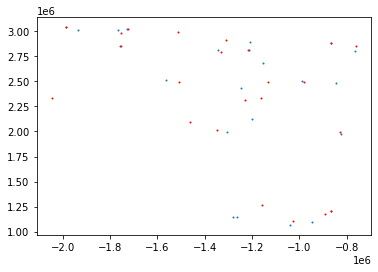

In [47]:
fig, ax = plt.subplots()

ax.scatter(usdm_x_origins, usdm_y_origins, s=1)
ax.scatter(usdm_x_terminations, usdm_y_terminations, s=1, c='r')

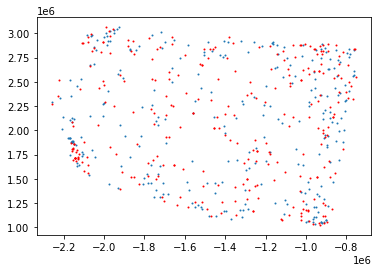

In [48]:
fig, ax = plt.subplots()

ax.scatter(spi30d_x_origins, spi30d_y_origins, s=1)
ax.scatter(spi30d_x_terminations, spi30d_y_terminations, s=1, c='r')

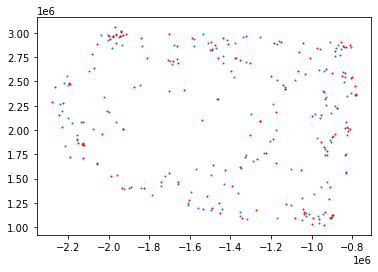

In [49]:
fig, ax = plt.subplots()

ax.scatter(spi180d_x_origins, spi180d_y_origins, s=1)
ax.scatter(spi180d_x_terminations, spi180d_y_terminations, s=1, c='r')

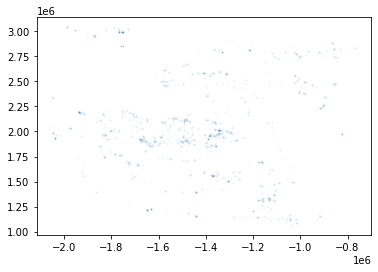

In [50]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(usdm_dtd['x']), np.hstack(usdm_dtd['y']), alpha=0.05, s=1)

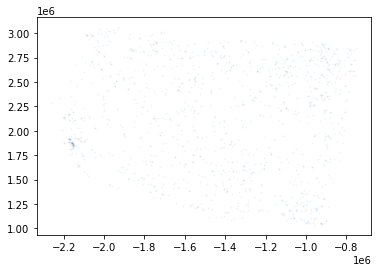

In [51]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi30d_dtd['x']), np.hstack(spi30d_dtd['y']), alpha=0.05, s=1)

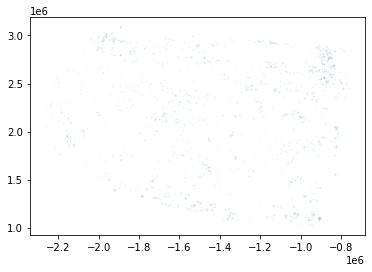

In [52]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi180d_dtd['x']), np.hstack(spi180d_dtd['y']), alpha=0.05, s=1)

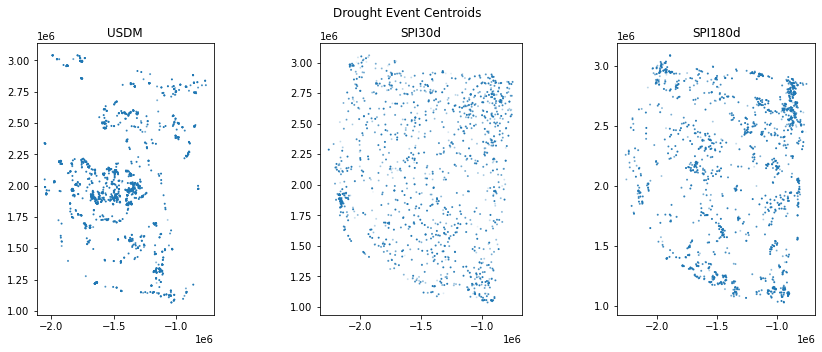

In [53]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(np.hstack(data['x']), np.hstack(data['y']), alpha=np.hstack(data['a']), s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

In [54]:
import geopandas as gpd

In [55]:
df = gpd.read_file('/pool0/home/steinjao/data/drought/drought_impact/data/geometry/tl_2022_us_state.shp')
df.to_crs("EPSG:4326");
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

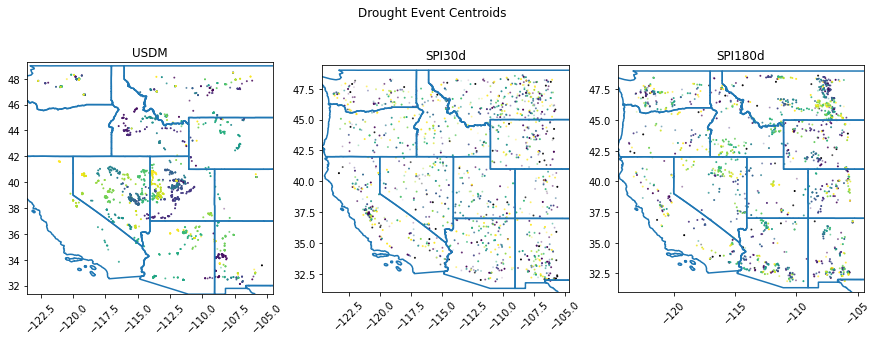

In [56]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):

    colors = []
    for track in data['c']:
        for val in track:
            colors.append(val)
    x = np.hstack(data['x'])
    y = np.hstack(data['y'])


    lat, lon = dnw.transform_points(x, y)
    ax.scatter(lon, lat, alpha=np.hstack(data['a']), s=1, c=colors)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    us49.boundary.plot(ax=ax)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_aspect('equal')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

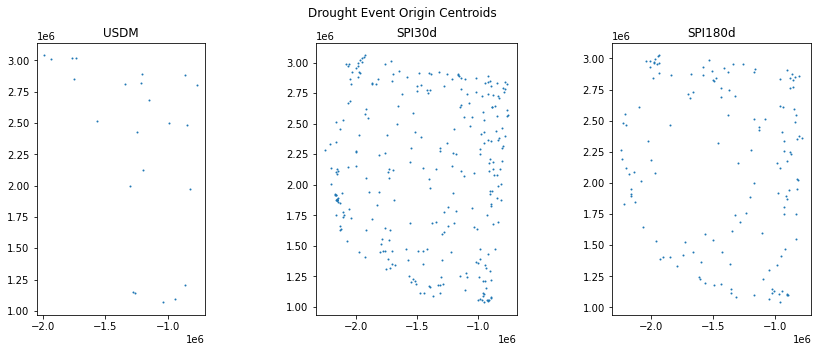

In [57]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_origins, y_origins, title in zip(
    axs.ravel(), 
    [usdm_x_origins, spi30d_x_origins, spi180d_x_origins],
    [usdm_y_origins, spi30d_y_origins, spi180d_y_origins],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_origins, y_origins, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Origin Centroids')
fig.set_facecolor('w')

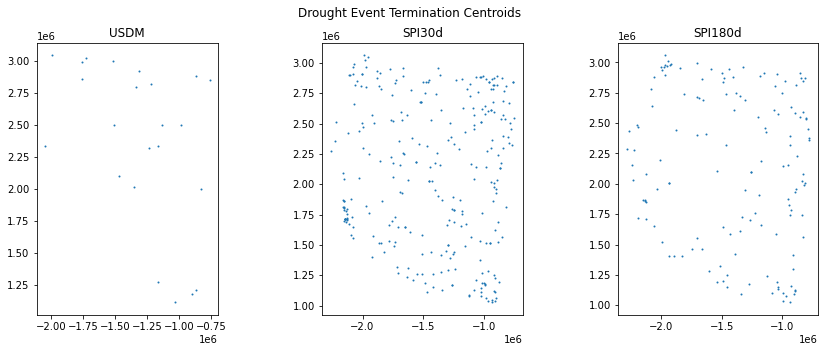

In [58]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_terminations, y_terminations, title in zip(
    axs.ravel(), 
    [usdm_x_terminations, spi30d_x_terminations, spi180d_x_terminations],
    [usdm_y_terminations, spi30d_y_terminations, spi180d_y_terminations],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_terminations, y_terminations, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Termination Centroids')
fig.set_facecolor('w')

## Area Signature

### USDM

In [59]:
intervals = list(set(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(1825.0, 8141.0, closed='right'),
 Interval(0.0, 30.0, closed='right'),
 Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(90.0, 180.0, closed='right'),
 Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right')]

In [60]:
sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

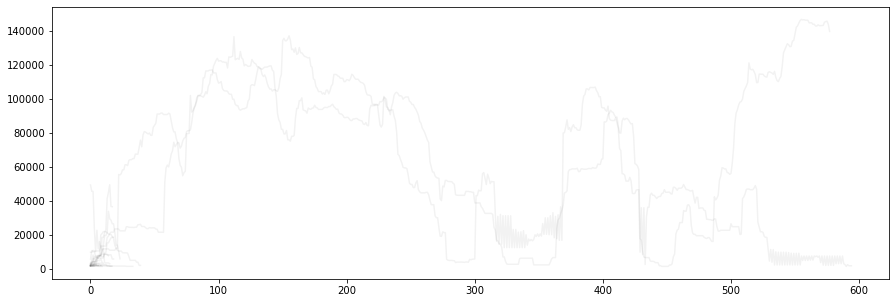

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in usdm_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

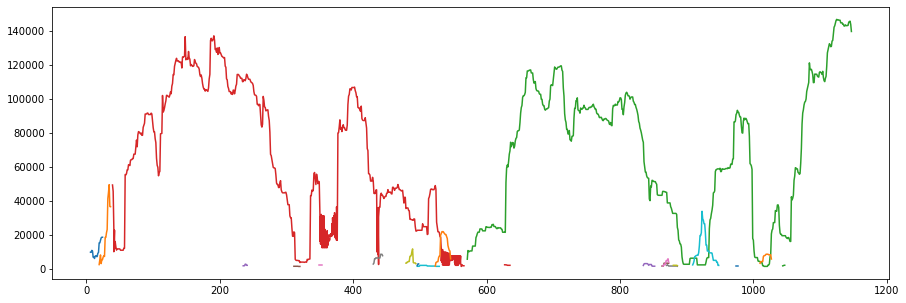

In [62]:
fig, ax = plt.subplots(figsize=(15,5))

for t_track, s_track in zip(usdm_dtd['t'], usdm_dtd['s']):
    ax.plot(t_track, s_track)

In [63]:
usdm_dnet = dnet.DroughtNetwork.unpickle(f"/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net_{exp_tag}.pickle")

In [64]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')

In [65]:
usdm_dates = paired_ds['USDM Date'].values

In [66]:
usdm_dnet.nodes[0]

time: 6, id: 0

In [67]:
usdm_dnet.nodes[-1]

time: 1148, id: 1813

In [68]:
cmap = mpl.colors.ListedColormap('white')

Text(0, 0.5, 'Area in Drought Event (km2)')

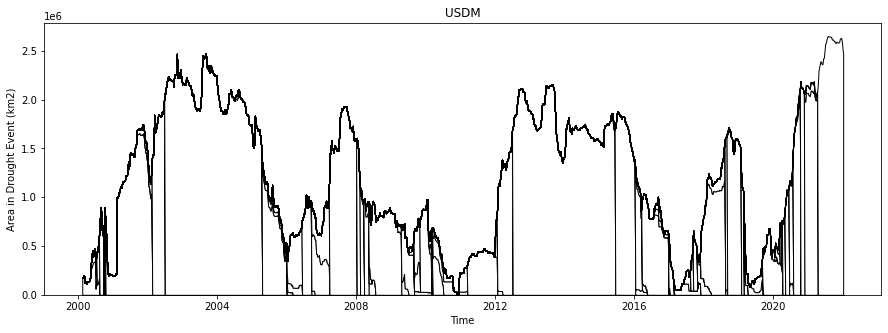

In [81]:
fig, ax = plt.subplots(figsize=(15,5))

usdm_dnet.stacked_events_plot(edgecolor='k', ax=ax, times=paired_ds['USDM Date'].values[6:], cmap=cmap, area_scalar=18.1)
fig.set_facecolor('w')
ax.set_title('USDM')
ax.set_ylabel('Area in Drought Event (km2)')

In [82]:
spi30d_dnet = dnet.DroughtNetwork.unpickle(f"/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_30d_net_{exp_tag}.pickle")

In [83]:
spi30d_dnet.nodes[0]

time: 1, id: 0

In [84]:
spi_dates = paired_ds['SPI Date'].values

Text(0, 0.5, 'Area in Drought Event (km2)')

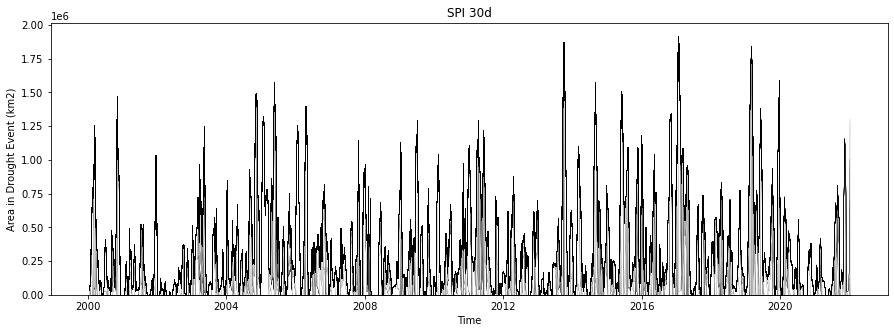

In [85]:
fig, ax = plt.subplots(figsize=(15,5))

spi30d_dnet.stacked_events_plot(ax=ax, edgecolor='k', linewidth=0.1, times=spi_dates[1:], cmap=cmap, area_scalar=18.1)
fig.set_facecolor('w')
ax.set_title('SPI 30d')
ax.set_ylabel('Area in Drought Event (km2)')

In [86]:
spi180d_dnet = dnet.DroughtNetwork.unpickle(f"/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_180d_net_{exp_tag}.pickle")

In [87]:
spi180d_dnet.nodes[0]

time: 26, id: 0

Text(0, 0.5, 'Area in Drought Event (km2)')

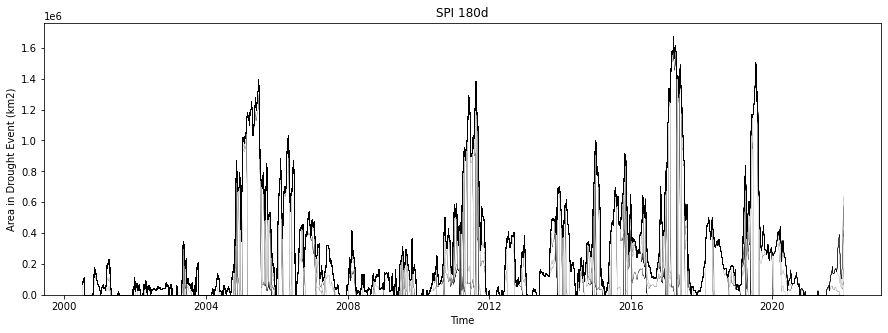

In [88]:
fig, ax = plt.subplots(figsize=(15,5))

spi180d_dnet.stacked_events_plot(ax=ax, edgecolor='k', linewidth=0.1, times=spi_dates[26:], cmap=cmap, area_scalar=18.1)
fig.set_facecolor('w')
ax.set_title('SPI 180d')
ax.set_ylabel('Area in Drought Event (km2)')

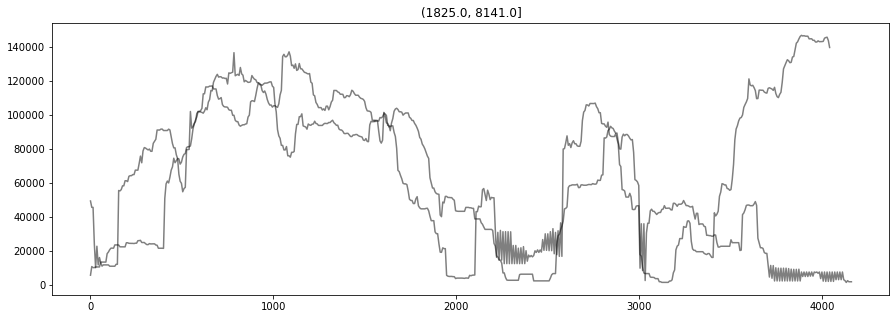

In [89]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

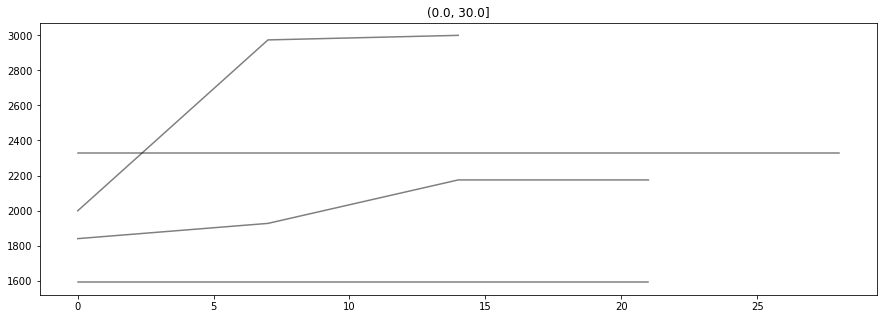

In [90]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

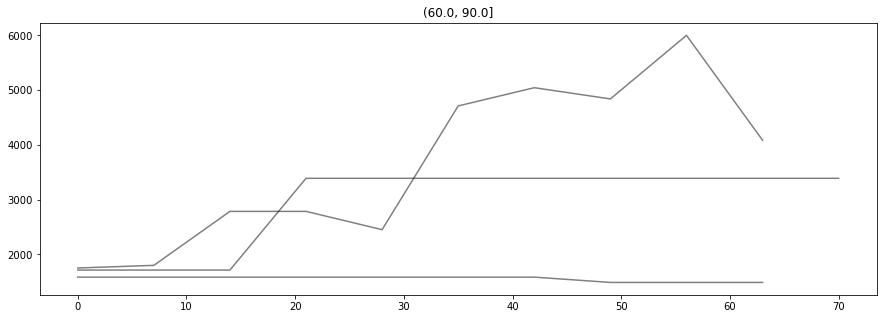

In [91]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

KeyError: nan

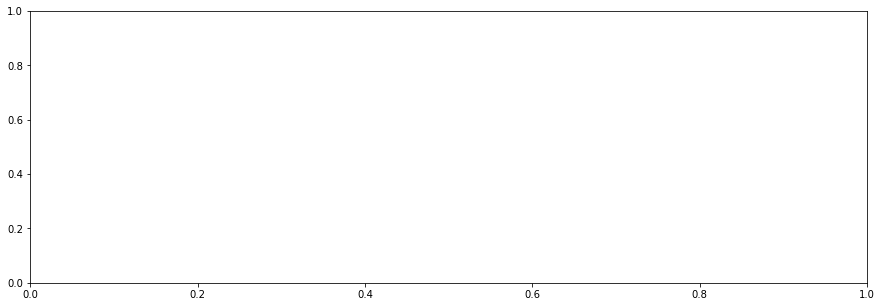

In [92]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

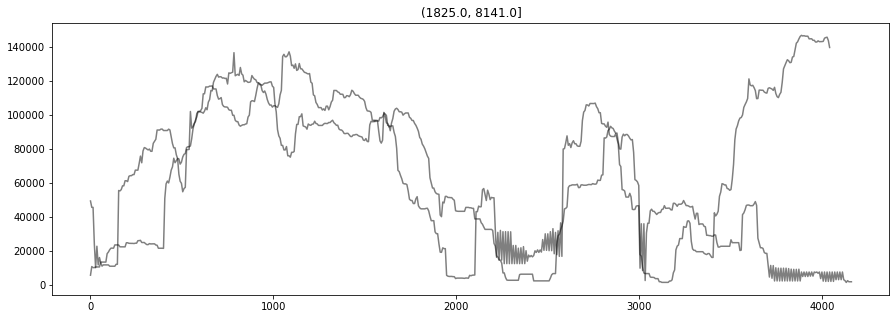

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

KeyError: nan

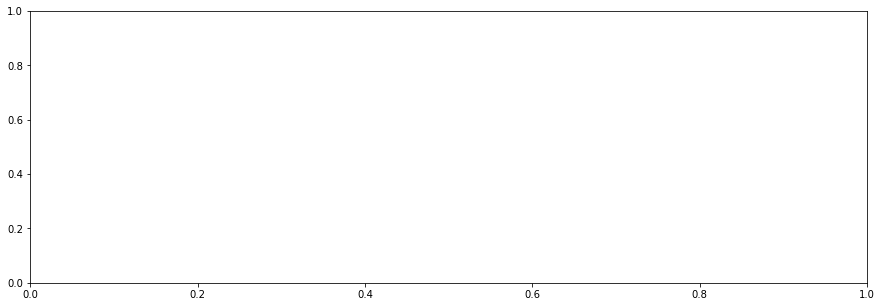

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

KeyError: nan

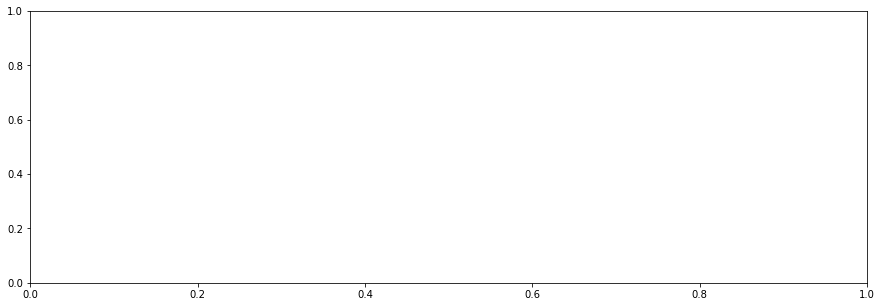

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 6

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

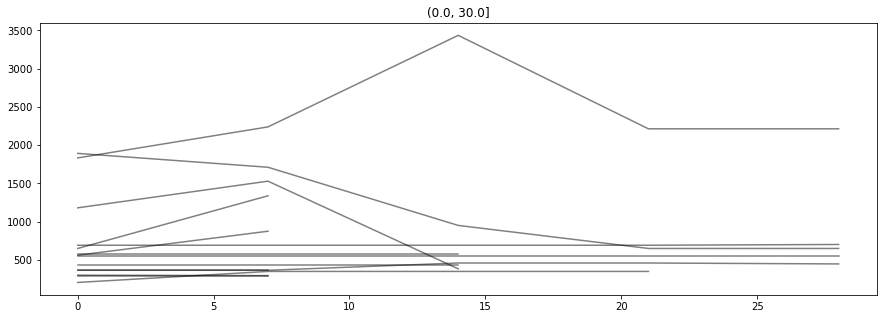

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 7

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

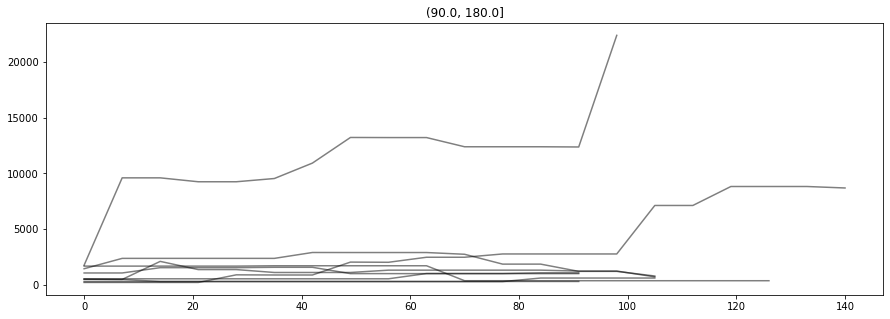

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 8

sample_tracks = pd.DataFrame(usdm_summ).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

### SPI

In [ ]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(0.0, 30.0, closed='right'),
 Interval(30.0, 60.0, closed='right')]

In [ ]:
sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

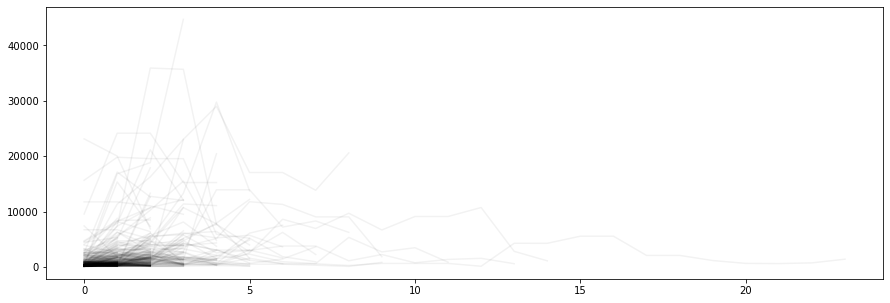

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in spi30d_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

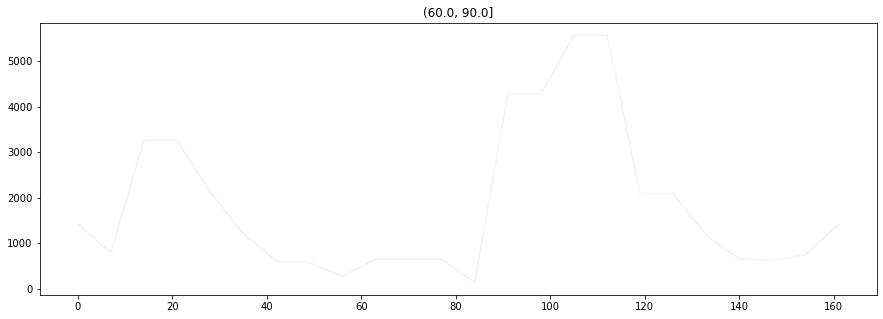

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

KeyError: nan

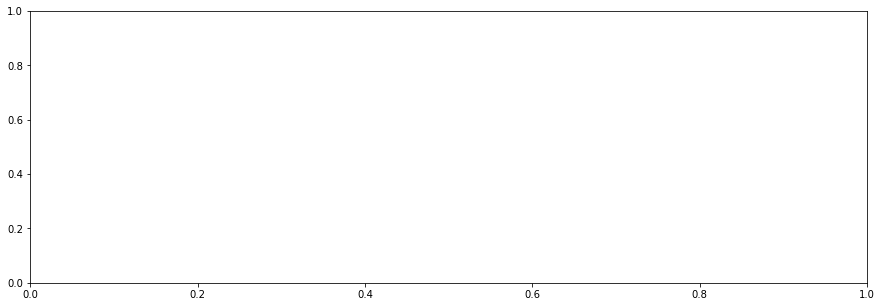

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

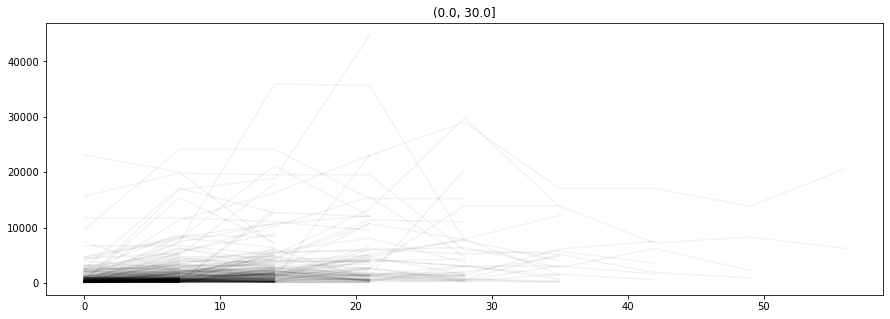

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

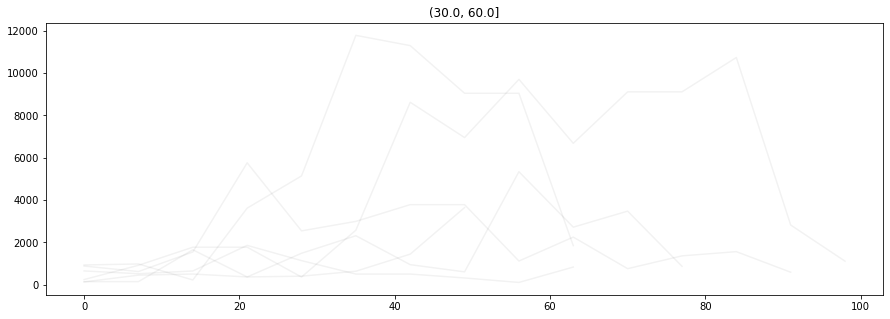

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

IndexError: list index out of range

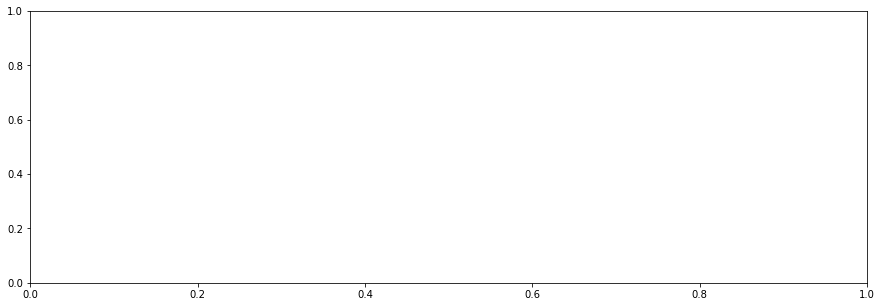

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

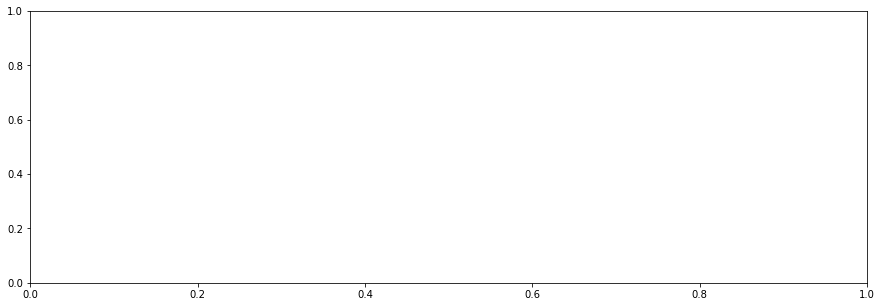

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(spi30d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

### SPI 180D

In [ ]:
intervals = list(set(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right'),
 Interval(60.0, 90.0, closed='right'),
 nan,
 Interval(0.0, 30.0, closed='right'),
 Interval(90.0, 180.0, closed='right')]

In [ ]:
sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])['xy_size'].values

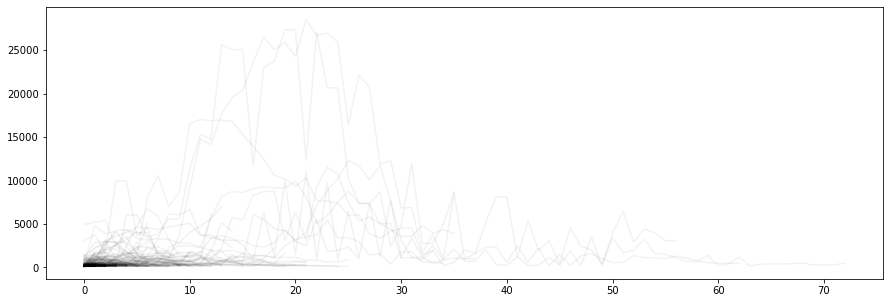

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

for s_track in spi180d_dtd['s']:
    times = np.arange(0, len(s_track))
    ax.plot(times, s_track, c='k', alpha=0.05)

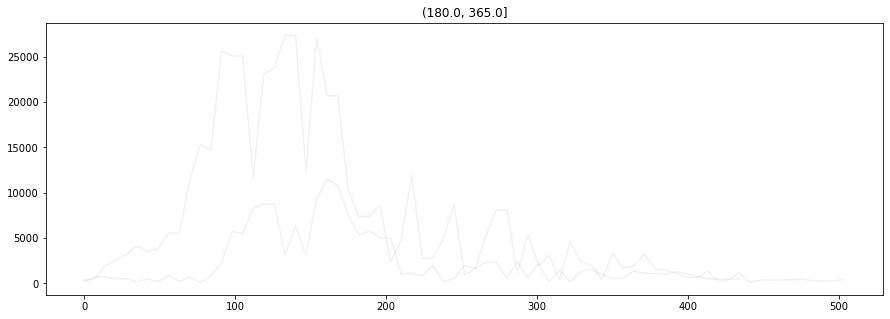

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

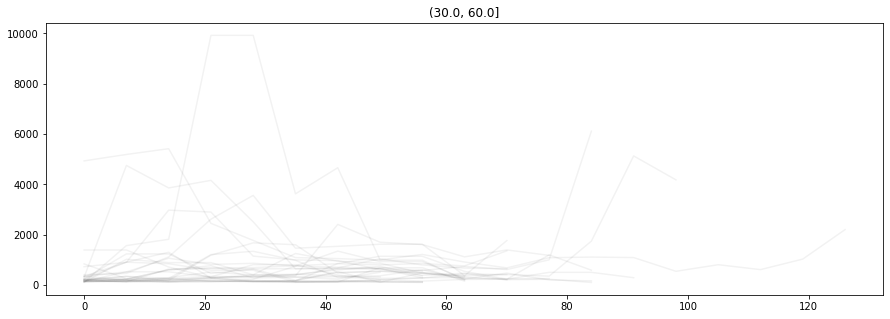

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 1

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

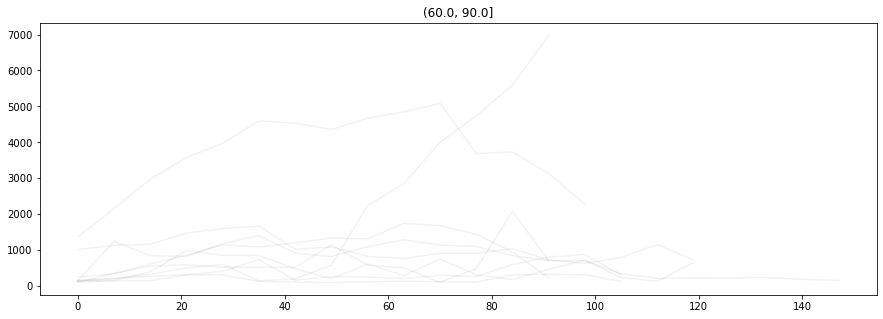

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 2

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

KeyError: nan

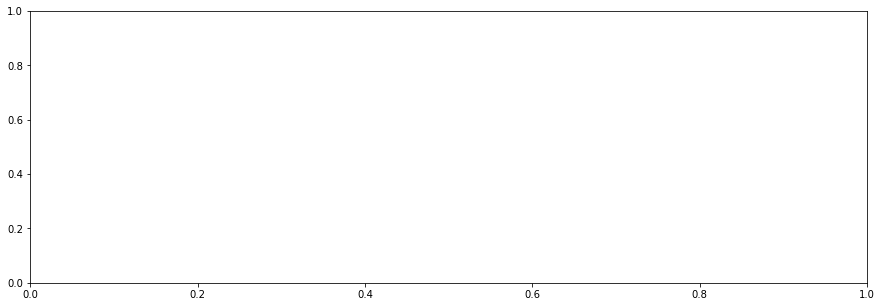

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 3

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.05)
ax.set_title(intervals[i]);

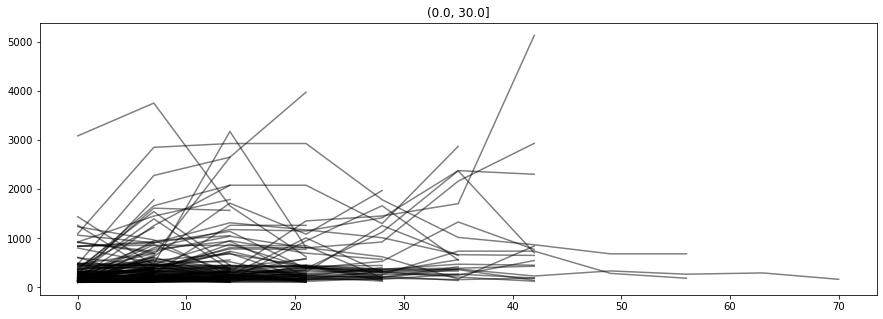

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 4

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

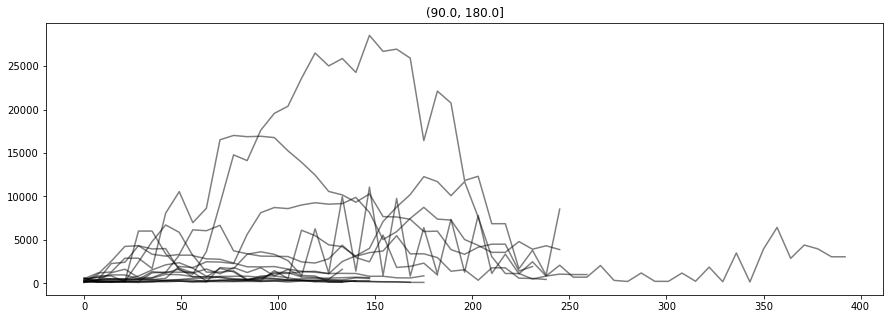

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 5

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

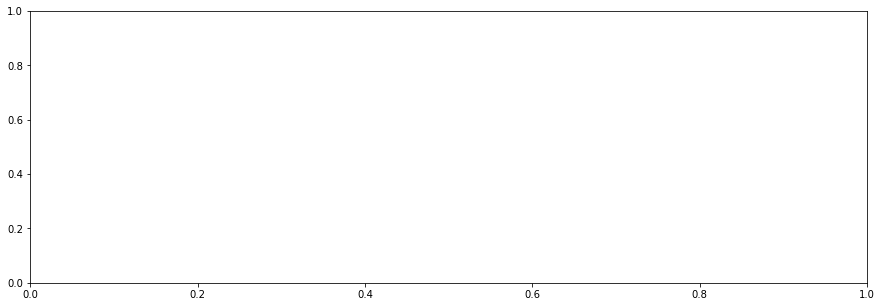

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 6

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);

IndexError: list index out of range

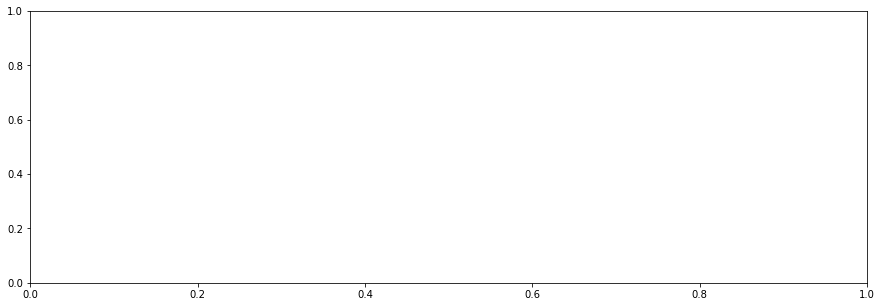

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

i = 7

sample_tracks = pd.DataFrame(spi180d_summ).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[i])['xy_size'].values

for s_track in sample_tracks:
    times = np.arange(0, len(s_track))*7
    ax.plot(times, s_track, c='k', alpha=0.5)
ax.set_title(intervals[i]);